<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/dataset_new.zip 

Archive:  /content/dataset_new.zip
   creating: dataset_new/
   creating: dataset_new/test/
   creating: dataset_new/test/no_yawn/
  inflating: dataset_new/test/no_yawn/1004.jpg  
  inflating: dataset_new/test/no_yawn/1007.jpg  
  inflating: dataset_new/test/no_yawn/1010.jpg  
  inflating: dataset_new/test/no_yawn/1033.jpg  
  inflating: dataset_new/test/no_yawn/1044.jpg  
  inflating: dataset_new/test/no_yawn/1050.jpg  
  inflating: dataset_new/test/no_yawn/1063.jpg  
  inflating: dataset_new/test/no_yawn/1067.jpg  
  inflating: dataset_new/test/no_yawn/1096.jpg  
  inflating: dataset_new/test/no_yawn/1114.jpg  
  inflating: dataset_new/test/no_yawn/1118.jpg  
  inflating: dataset_new/test/no_yawn/1129.jpg  
  inflating: dataset_new/test/no_yawn/113.jpg  
  inflating: dataset_new/test/no_yawn/1134.jpg  
  inflating: dataset_new/test/no_yawn/115.jpg  
  inflating: dataset_new/test/no_yawn/1213.jpg  
  inflating: dataset_new/test/no_yawn/1267.jpg  
  inflating: dataset_new/test/no_yawn/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 1310 images belonging to 2 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary',shuffle=False)

Found 215 images belonging to 2 classes.


In [5]:
im=plt.imread("/content/drive/MyDrive/archive/dataset_new/train/yawn/11.jpg")


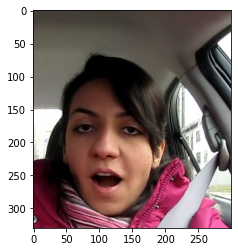

In [6]:
plt.imshow(im[20:350, 200:500, :])

In [7]:
import os

In [8]:
import glob
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/no_yawn" , f'test_images_noyawn{i}.jpg'), im)

In [14]:

for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/yawn" , f'test_images_yawn{i}.jpg'), im)

In [9]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/no_yawn" , f'train_images_noyawn{i}.jpg'), im)

In [10]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/yawn" , f'train_images_yawn{i}.jpg'), im)

In [11]:
# Add the image to a batch
from keras.preprocessing import image
from tensorflow.keras import layers
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")



Found 215 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


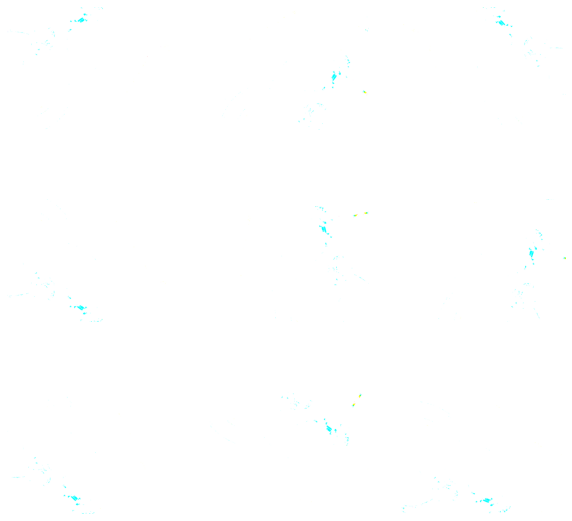

In [18]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [19]:
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")

Found 1310 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


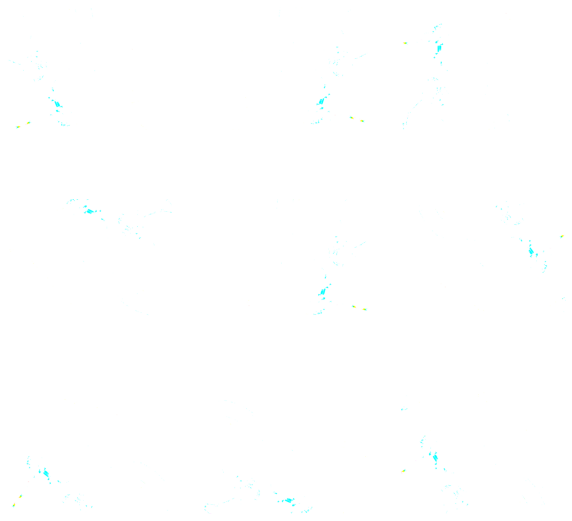

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
#build CNN model
#intialize
cnn=tf.keras.models.Sequential()

In [ ]:
from tensorflow.keras import layers

In [ ]:
#convolution
from keras.regularizers import l2
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
                              
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
#add one more layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'
      ))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'
      ))
cnn.add(tf.keras.layers.Dropout(0.25))
#Flatten
cnn.add(tf.keras.layers.Flatten())
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))
#Output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
#Compile the model
cnn.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 dropout_21 (Dropout)        (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

In [ ]:
history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50
41/41 [==============================] - 7s 153ms/step - loss: 0.6950 - accuracy: 0.5420 - val_loss: 0.6768 - val_accuracy: 0.5674
Epoch 2/50
41/41 [==============================] - 6s 152ms/step - loss: 0.6475 - accuracy: 0.6183 - val_loss: 0.6630 - val_accuracy: 0.6093
Epoch 3/50
41/41 [==============================] - 6s 154ms/step - loss: 0.6297 - accuracy: 0.6397 - val_loss: 0.6409 - val_accuracy: 0.6186
Epoch 4/50
41/41 [==============================] - 6s 154ms/step - loss: 0.5839 - accuracy: 0.6794 - val_loss: 0.6134 - val_accuracy: 0.6372
Epoch 5/50
41/41 [==============================] - 6s 149ms/step - loss: 0.5649 - accuracy: 0.6802 - val_loss: 0.5935 - val_accuracy: 0.6791
Epoch 6/50
41/41 [==============================] - 6s 149ms/step - loss: 0.5401 - accuracy: 0.7092 - val_loss: 0.5836 - val_accuracy: 0.6837
Epoch 7/50
41/41 [==============================] - 6s 149ms/step - loss: 0.5178 - accuracy: 0.7160 - val_loss: 0.5760 - val_accuracy: 0.6791
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


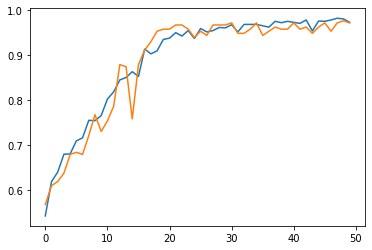

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

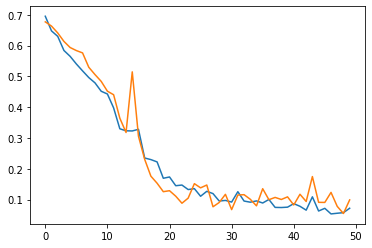

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
import tensorflow as tf
from tensorflow import keras
model=cnn
model.save('/content/drive/MyDrive/camera/cnnmodel.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/camera/cnnmodel.h5')
history=model.summary()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 dropout_21 (Dropout)        (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

In [ ]:
Y_pred = cnn.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
score = cnn.evaluate(validation_generator)
print(score)

7/7 [==============================] - 1s 95ms/step - loss: 0.0991 - accuracy: 0.9721
[0.09913408011198044, 0.9720930457115173]


In [ ]:
score = cnn.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
score

[0.09913408011198044, 0.9720930457115173]

In [ ]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
Y_pred

array([[2.9161962e-04],
       [1.0908221e-04],
       [2.1459507e-06],
       [4.6752964e-04],
       [9.6465768e-03],
       [3.1534100e-09],
       [5.5459436e-02],
       [7.6366402e-02],
       [1.4354962e-04],
       [2.1683923e-03],
       [1.7790349e-04],
       [5.5309222e-04],
       [9.7387666e-03],
       [2.8982988e-01],
       [3.8312585e-03],
       [3.4391407e-02],
       [1.8371435e-02],
       [1.1447028e-03],
       [1.5932595e-04],
       [1.4151791e-03],
       [1.3614725e-03],
       [6.7564738e-03],
       [6.7308205e-03],
       [2.0468990e-04],
       [1.2284523e-02],
       [2.9625667e-03],
       [1.4740875e-03],
       [1.4021104e-03],
       [7.9914375e-04],
       [3.5373471e-04],
       [1.0381978e-03],
       [5.2981242e-04],
       [2.7188212e-03],
       [3.4767610e-04],
       [1.1996420e-04],
       [2.7056556e-02],
       [9.3068513e-05],
       [1.3750839e-05],
       [5.9265457e-04],
       [8.5056955e-03],
       [2.5628094e-04],
       [8.577304

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict_generator(validation_generator)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
Y_pred

array([[2.9161962e-04],
       [1.0908221e-04],
       [2.1459507e-06],
       [4.6752964e-04],
       [9.6465768e-03],
       [3.1534100e-09],
       [5.5459436e-02],
       [7.6366402e-02],
       [1.4354962e-04],
       [2.1683923e-03],
       [1.7790349e-04],
       [5.5309222e-04],
       [9.7387666e-03],
       [2.8982988e-01],
       [3.8312585e-03],
       [3.4391407e-02],
       [1.8371435e-02],
       [1.1447028e-03],
       [1.5932595e-04],
       [1.4151791e-03],
       [1.3614725e-03],
       [6.7564738e-03],
       [6.7308205e-03],
       [2.0468990e-04],
       [1.2284523e-02],
       [2.9625667e-03],
       [1.4740875e-03],
       [1.4021104e-03],
       [7.9914375e-04],
       [3.5373471e-04],
       [1.0381978e-03],
       [5.2981242e-04],
       [2.7188212e-03],
       [3.4767610e-04],
       [1.1996420e-04],
       [2.7056556e-02],
       [9.3068513e-05],
       [1.3750839e-05],
       [5.9265457e-04],
       [8.5056955e-03],
       [2.5628094e-04],
       [8.577304

In [ ]:
y_pred = Y_pred > 0.93
cm= confusion_matrix(validation_generator.classes,y_pred)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
target_names = ['no_yawn','yawn']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     no_yawn       0.92      1.00      0.96       109
        yawn       1.00      0.92      0.96       106

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



In [ ]:
cm

array([[109,   0],
       [  9,  97]])

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['no_yawn','yawn']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[109   0]
 [  9  97]]
Classification Report
              precision    recall  f1-score   support

     no_yawn       0.92      1.00      0.96       109
        yawn       1.00      0.92      0.96       106

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



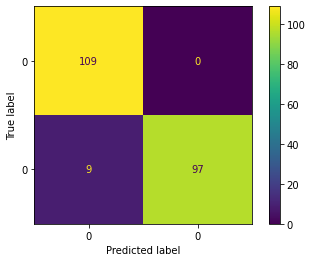

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=validation_generator.classes)
disp.plot()
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test/no_yawn/test_images_noyawn1.jpg',target_size=(64,64))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='yawn'
if result[0][1]==1:
    prediction='no yawn'

In [ ]:
prediction

'yawn'

In [ ]:
 train_generator.class_indices
    

{'no_yawn': 0, 'yawn': 1}

In [ ]:
result


array([[1.000000e+00, 5.396631e-24]], dtype=float32)

In [86]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as pl

In [87]:
image_size = [224,224]

In [89]:
train_path = '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train'
valid_path = '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test'

In [90]:
# Add the image to a batch
from keras.preprocessing import image
from tensorflow.keras import layers
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")

Found 215 files belonging to 2 classes.


In [91]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


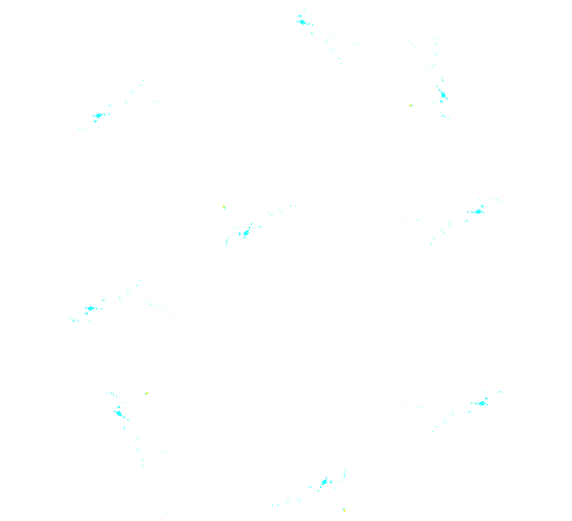

In [93]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [94]:
im=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")

Found 1310 files belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


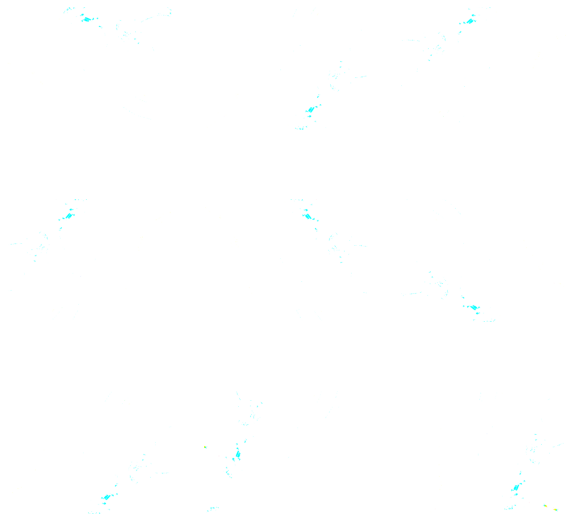

In [95]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Add the image to a batch.
image = tf.cast(tf.expand_dims(n, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [73]:
vgg = VGG16(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [74]:
 # don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [75]:
# useful for getting number of classes
folders = glob("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train/*")
print(len(folders))

2


In [76]:
folders

['/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train/no_yawn',
 '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train/yawn']

In [77]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [79]:
for layer in vgg.layers:
  layer.trainable = False

In [80]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

In [81]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [82]:
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [83]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [98]:
history=model.fit(x=training_set,validation_data=test_set,epochs=50)

Epoch 1/50
41/41 [==============================] - 20s 493ms/step - loss: 0.1339 - accuracy: 0.9649 - val_loss: 0.1683 - val_accuracy: 0.9116
Epoch 2/50
41/41 [==============================] - 20s 490ms/step - loss: 0.1256 - accuracy: 0.9687 - val_loss: 0.1581 - val_accuracy: 0.9442
Epoch 3/50
41/41 [==============================] - 20s 490ms/step - loss: 0.1120 - accuracy: 0.9740 - val_loss: 0.2391 - val_accuracy: 0.8977
Epoch 4/50
41/41 [==============================] - 21s 512ms/step - loss: 0.1034 - accuracy: 0.9740 - val_loss: 0.1427 - val_accuracy: 0.9442
Epoch 5/50
41/41 [==============================] - 20s 489ms/step - loss: 0.0927 - accuracy: 0.9763 - val_loss: 0.1460 - val_accuracy: 0.9488
Epoch 6/50
41/41 [==============================] - 22s 525ms/step - loss: 0.0871 - accuracy: 0.9809 - val_loss: 0.1581 - val_accuracy: 0.9535
Epoch 7/50
41/41 [==============================] - 20s 495ms/step - loss: 0.0861 - accuracy: 0.9824 - val_loss: 0.1865 - val_accuracy: 0.9070

In [100]:
import tensorflow as tf
from tensorflow import keras
model.save('/content/drive/MyDrive/camera/vgg16model.h5')

In [101]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/camera/vgg16model.h5")
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


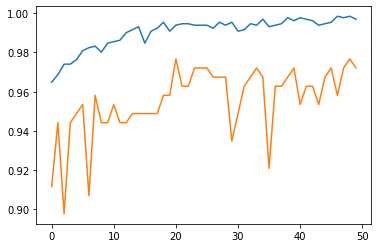

In [103]:
# accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

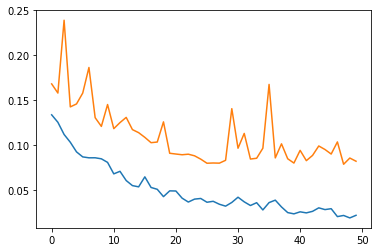

In [104]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [138]:
Y_pred=model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [139]:
Y_pred

array([[[[1.3446686 , 0.        , 0.04304829, ..., 0.        ,
          0.47058833, 0.        ],
         [2.0349145 , 0.        , 0.39690357, ..., 0.        ,
          0.4816041 , 0.        ]],

        [[1.5667819 , 0.        , 0.2851044 , ..., 0.11699692,
          0.48978576, 0.        ],
         [2.351356  , 0.        , 0.        , ..., 0.48471904,
          0.5598086 , 0.        ]]],


       [[[0.9561017 , 0.        , 0.7895442 , ..., 0.        ,
          0.5524707 , 0.        ],
         [1.5900353 , 0.        , 0.6875571 , ..., 0.        ,
          0.911574  , 0.        ]],

        [[1.3071253 , 0.        , 0.873258  , ..., 0.42907378,
          0.9664434 , 0.        ],
         [1.6749723 , 0.        , 0.33636987, ..., 0.29744846,
          1.4112898 , 0.        ]]],


       [[[1.8328742 , 0.        , 0.8632325 , ..., 0.        ,
          0.442249  , 0.        ],
         [2.13006   , 0.        , 0.6529344 , ..., 0.        ,
          0.7378447 , 0.        ]],

      

In [140]:
validation_generator.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = Y_pred >0.95
y_pred


array([[[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]]],


       [[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False, False, ..., False,  True, False],
         [ True, False, False, ..., False,  True, False]]],


       [[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False,  True, ..., False, False, False],
         [ True, False, False, ..., False, False, False]]],


       ...,


       [[[False, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[False, False, False, ..., False,  True, False],
         [False, False, False, ..., False,  True, False]]],


       [[[ True, False, False, ...

In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict_generator(validation_generator)
Y_pred


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


array([[[[1.3446686 , 0.        , 0.04304829, ..., 0.        ,
          0.47058833, 0.        ],
         [2.0349145 , 0.        , 0.39690357, ..., 0.        ,
          0.4816041 , 0.        ]],

        [[1.5667819 , 0.        , 0.2851044 , ..., 0.11699692,
          0.48978576, 0.        ],
         [2.351356  , 0.        , 0.        , ..., 0.48471904,
          0.5598086 , 0.        ]]],


       [[[0.9561017 , 0.        , 0.7895442 , ..., 0.        ,
          0.5524707 , 0.        ],
         [1.5900353 , 0.        , 0.6875571 , ..., 0.        ,
          0.911574  , 0.        ]],

        [[1.3071253 , 0.        , 0.873258  , ..., 0.42907378,
          0.9664434 , 0.        ],
         [1.6749723 , 0.        , 0.33636987, ..., 0.29744846,
          1.4112898 , 0.        ]]],


       [[[1.8328742 , 0.        , 0.8632325 , ..., 0.        ,
          0.442249  , 0.        ],
         [2.13006   , 0.        , 0.6529344 , ..., 0.        ,
          0.7378447 , 0.        ]],

      

In [112]:
y_pred = Y_pred > 0.93
y_pred


array([[[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]]],


       [[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False, False, ..., False,  True, False],
         [ True, False, False, ..., False,  True, False]]],


       [[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False,  True, ..., False, False, False],
         [ True, False, False, ..., False, False, False]]],


       ...,


       [[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[False, False, False, ..., False,  True, False],
         [False, False, False, ..., False,  True, False]]],


       [[[ True, False, False, ...

In [142]:
y_pred = Y_pred>0.95
y_pred


array([[[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]]],


       [[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False, False, ..., False,  True, False],
         [ True, False, False, ..., False,  True, False]]],


       [[[ True, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[ True, False,  True, ..., False, False, False],
         [ True, False, False, ..., False, False, False]]],


       ...,


       [[[False, False, False, ..., False, False, False],
         [ True, False, False, ..., False, False, False]],

        [[False, False, False, ..., False,  True, False],
         [False, False, False, ..., False,  True, False]]],


       [[[ True, False, False, ...

In [113]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [144]:
target_names = ['no_yawn','yawn']

In [149]:
from sklearn.metrics import classification_report
print(confusion_matrix(validation_generator.classes, y_pred))
print('Confusion Matrix')


ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(validation_generator.classes, Y_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=targets.classes_)
disp.plot()
plt.show()


NameError: ignored

In [12]:
import numpy as np
from keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [13]:
training_set=("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train")
test_set=("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test")

In [17]:
train_generator.class_indices
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 1310 images belonging to 2 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 215 images belonging to 2 classes.


In [19]:
resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [20]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dropout(0.3))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dropout(0.3))
resnet_model.add(Dense(1, activation='sigmoid'))

In [21]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5

In [22]:
resnet_model.compile(
  loss='binary_crossentropy',
  optimizer='RMSprop',
  metrics=['accuracy'])

In [24]:
history=resnet_model.fit(x=train_generator,validation_data=validation_generator,epochs=20)

Epoch 1/20
41/41 [==============================] - 19s 449ms/step - loss: 0.5882 - accuracy: 0.6649 - val_loss: 0.5815 - val_accuracy: 0.6186
Epoch 2/20
41/41 [==============================] - 10s 253ms/step - loss: 0.5698 - accuracy: 0.6893 - val_loss: 0.6095 - val_accuracy: 0.6186
Epoch 3/20
41/41 [==============================] - 7s 173ms/step - loss: 0.5860 - accuracy: 0.6649 - val_loss: 0.5747 - val_accuracy: 0.6558
Epoch 4/20
41/41 [==============================] - 7s 160ms/step - loss: 0.5904 - accuracy: 0.6687 - val_loss: 0.6348 - val_accuracy: 0.6093
Epoch 5/20
41/41 [==============================] - 7s 159ms/step - loss: 0.5899 - accuracy: 0.6679 - val_loss: 0.5846 - val_accuracy: 0.6512
Epoch 6/20
41/41 [==============================] - 7s 160ms/step - loss: 0.5714 - accuracy: 0.6733 - val_loss: 0.5913 - val_accuracy: 0.6605
Epoch 7/20
41/41 [==============================] - 7s 159ms/step - loss: 0.5763 - accuracy: 0.6824 - val_loss: 0.5765 - val_accuracy: 0.6372
Epoc

In [25]:
import tensorflow as tf
from tensorflow import keras
model=resnet_model
model.save('/content/drive/MyDrive/camera/resnet50model.h5')


In [26]:
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/camera/resnet50model.h5")
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


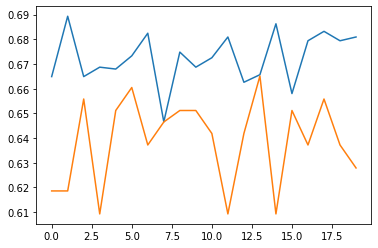

In [27]:
# accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

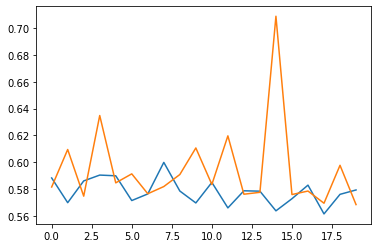

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = resnet_model.predict_generator(validation_generator)
Y_pred



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


array([[0.6432371 ],
       [0.6514967 ],
       [0.6415038 ],
       [0.6473191 ],
       [0.65265435],
       [0.6486678 ],
       [0.6584448 ],
       [0.63791454],
       [0.64756215],
       [0.6471247 ],
       [0.64410466],
       [0.66712713],
       [0.64504206],
       [0.6499346 ],
       [0.64198685],
       [0.6463642 ],
       [0.6533873 ],
       [0.65177405],
       [0.6608112 ],
       [0.65199095],
       [0.65942204],
       [0.6387859 ],
       [0.6546773 ],
       [0.64800304],
       [0.6517403 ],
       [0.6477465 ],
       [0.6499792 ],
       [0.645975  ],
       [0.6495499 ],
       [0.6416588 ],
       [0.66055745],
       [0.6448781 ],
       [0.65173256],
       [0.6552699 ],
       [0.65727985],
       [0.64608616],
       [0.6489143 ],
       [0.6471847 ],
       [0.6453166 ],
       [0.6412504 ],
       [0.6512671 ],
       [0.6531555 ],
       [0.6541992 ],
       [0.64797974],
       [0.6508772 ],
       [0.6585644 ],
       [0.6443947 ],
       [0.644

In [48]:
validation_generator.classes
Y_pred


array([[0.6432371 ],
       [0.6514967 ],
       [0.6415038 ],
       [0.6473191 ],
       [0.65265435],
       [0.6486678 ],
       [0.6584448 ],
       [0.63791454],
       [0.64756215],
       [0.6471247 ],
       [0.64410466],
       [0.66712713],
       [0.64504206],
       [0.6499346 ],
       [0.64198685],
       [0.6463642 ],
       [0.6533873 ],
       [0.65177405],
       [0.6608112 ],
       [0.65199095],
       [0.65942204],
       [0.6387859 ],
       [0.6546773 ],
       [0.64800304],
       [0.6517403 ],
       [0.6477465 ],
       [0.6499792 ],
       [0.645975  ],
       [0.6495499 ],
       [0.6416588 ],
       [0.66055745],
       [0.6448781 ],
       [0.65173256],
       [0.6552699 ],
       [0.65727985],
       [0.64608616],
       [0.6489143 ],
       [0.6471847 ],
       [0.6453166 ],
       [0.6412504 ],
       [0.6512671 ],
       [0.6531555 ],
       [0.6541992 ],
       [0.64797974],
       [0.6508772 ],
       [0.6585644 ],
       [0.6443947 ],
       [0.644

In [82]:

cm= confusion_matrix(validation_generator.classes,y_pred)
y_pred



array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [83]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [84]:
cm

array([[109,   0],
       [106,   0]])

In [85]:
target_names = ['no_yawn','yawn']
print(classification_report(validation_generator.classes, y_pred,target_names=target_names))


              precision    recall  f1-score   support

     no_yawn       0.51      1.00      0.67       109
        yawn       0.00      0.00      0.00       106

    accuracy                           0.51       215
   macro avg       0.25      0.50      0.34       215
weighted avg       0.26      0.51      0.34       215



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


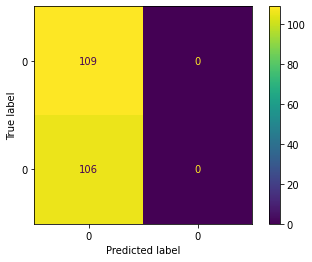

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=validation_generator.classes)
disp.plot()
plt.show()


In [ ]:
Y_pred = model.predict_generator(validation_generator)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict_generator(validation_generator)
cm= confusion_matrix(validation_generator.classes, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=targets.classes_)
disp.plot()
plt.show()


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [ ]:
pre_trained_model = InceptionV3(input_shape = (150,150,3) ,include_top = False,weights = 'imagenet')

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.959):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(150, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)  

In [ ]:
 model=InceptionV3()

 model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/train",
                                                    batch_size = 32,
                                                    class_mode = 'binary', 
                                                    target_size = (150,150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( "/content/drive/MyDrive/drowsiness_cropped (1)/drowsiness_cropped/test",
                                                          batch_size  = 32,
                                                          class_mode  = 'binary', 
                                                          target_size = (150,150))

Found 1310 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [ ]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,validation_data =test_set,epochs =10,verbose = 2,callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10


ValueError: ignored